<a href="https://colab.research.google.com/github/Fredo54/CAP4630/blob/master/HW_3/HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf

Problem 1

In [0]:
def get_random_data(w, b, mu, sigma, m):
  #two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).
  data = np.zeros((m, 2))
  labels = np.zeros((m, 1))
  #The entries of the arrays should be generated as follows. For each row i in {0, 1, ..., m-1}:
  for i in range(m):
    c = np.random.randint(2,size=1)
    n = np.random.default_rng().normal(mu, sigma)
    #uniformly at random in the interval [0, 1).
    x_1 = random.random() 
    x_2 = w * x_1 + b + (-1)**c * n
    labels[i] = c
    data[i][0] = x_1
    data[i][1] = x_2

  return data, labels

In [0]:
def display_random_data(data, labels):
  # Separate data into points generated above the line (labeled 0) and points
  # generated below the line (labeled 1)
  
  for i in range(labels.shape[0]):
    plt.scatter(data[i, 0], data[i, 1], c = ("red" if labels[i] else "blue"))

  plt.show()

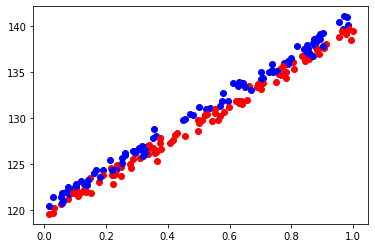

In [5]:
small_data, small_labels = get_random_data(20, 120, 0.5, 0.5, 200)
display_random_data(small_data, small_labels)


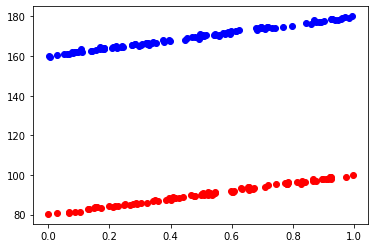

In [0]:
large_data, large_labels = get_random_data(20, 120, 40, 0.5, 200)
display_random_data(large_data, large_labels)

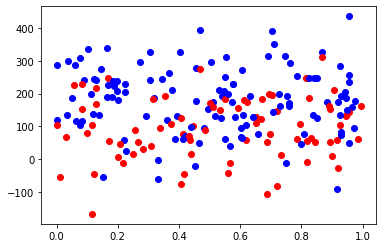

In [0]:
# Increasing Noise disrupts the blue and red "lines"
large_data, large_labels = get_random_data(20, 120, 40, 100, 200)
display_random_data(large_data, large_labels)

Train Data


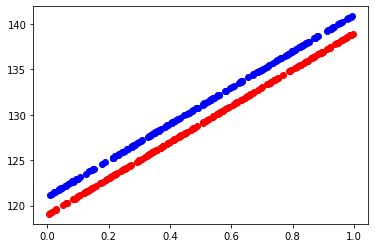

Test Data


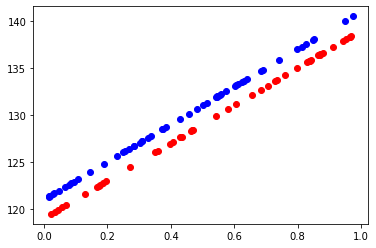

In [0]:
# Split data and labels into training set and test set
data, labels = get_random_data(20,120,1,.01,500)

train_size = int(0.8 * labels.shape[0])

test_data = data[train_size:]
test_labels = labels[train_size:]
train_data = data[:train_size]  
train_labels = labels[:train_size]

print("Train Data")
display_random_data(train_data, train_labels)
print("Test Data")
display_random_data(test_data, test_labels)

Problem 2

In [0]:
model = models.Sequential()
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=50, batch_size=1024)

Epoch 1/50
1/1 [==============================] - 0s 2ms/step - loss: 57.1444 - accuracy: 0.4875
Epoch 2/50
1/1 [==============================] - 0s 2ms/step - loss: 56.9325 - accuracy: 0.4875
Epoch 3/50
1/1 [==============================] - 0s 2ms/step - loss: 56.7788 - accuracy: 0.4875
Epoch 4/50
1/1 [==============================] - 0s 2ms/step - loss: 56.6502 - accuracy: 0.4875
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: 56.5359 - accuracy: 0.4875
Epoch 6/50
1/1 [==============================] - 0s 1ms/step - loss: 56.4312 - accuracy: 0.4875
Epoch 7/50
1/1 [==============================] - 0s 2ms/step - loss: 56.3334 - accuracy: 0.4875
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: 56.2406 - accuracy: 0.4875
Epoch 9/50
1/1 [==============================] - 0s 1ms/step - loss: 56.1519 - accuracy: 0.4875
Epoch 10/50
1/1 [==============================] - 0s 1ms/step - loss: 56.0663 - accuracy: 0.4875
Epoch 11/50
1/1 [============

In [0]:
w_real = 4.0
b_real = 7.0
weights = model.get_weights()
w_1 = weights[0][0][0]
w_2 = weights[0][1][0]
b = weights[1][0]
w_line = w_1 / w_2 * -1
b_line = b / w_2 * -1

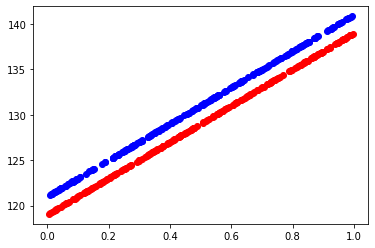

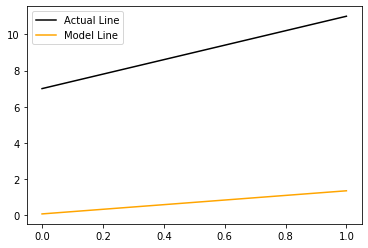

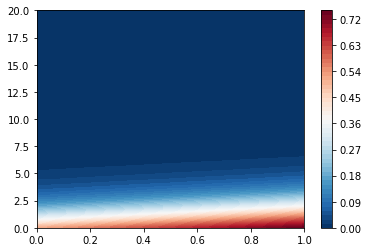

In [0]:
display_random_data(data, labels)
x_1 = np.linspace(0.0, 1.0)
x_2_real = x_1 * w_real + b_real
x_2_prediction = x_1 * w_line + b_line
plt.plot(x_1, x_2_real, color='black', label='Actual Line')
plt.plot(x_1, x_2_prediction, color='orange', label='Model Line')
plt.legend()
plt.show()



x = np.linspace(0, 1, 50)
y = np.linspace(0, 20, 50)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()
Z = model.predict(np.column_stack((X, Y)))
Z = Z.flatten()
plt.tricontourf(X, Y, Z, 50, cmap='RdBu_r')
plt.colorbar();



Problem 3

In [0]:
epochs = 50
lr = 0.01
weight = np.random.randn(3)
m = train_labels.shape[0]
X_b = np.column_stack([np.ones((m, 1)), train_data])
y = train_labels

for epoch in range(epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  
  for i in range(m):
    xi = X_b_shuffled[i]
    yi = y_shuffled[i]
    z = xi.dot(weight)
    a = 1.0 / (1.0 + np.exp(-z))
    gradient = (a - yi) * xi
    weight -= lr * gradient

for i in range(m):
  # Output of model
  xi = X_b[i]
  yi = y[i]
  z = xi.dot(weight)
  a = 1.0 / (1.0 + np.exp(-z))

  loss += -yi * np.log(a) - (1-yi)*np.log(1-a)

  # Determine whether label 0 or 1
  if a >= 0.5:
    prediction = 1.0
  else:
    prediction = 0.0

  if prediction == yi:
    accuracy += 1

accuracy = accuracy / m
loss = loss / m


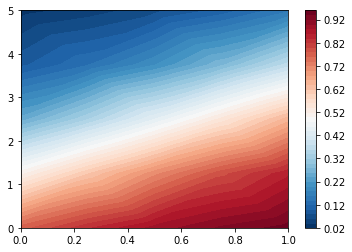

In [0]:

x = np.linspace(0, 1, 5)
y = np.linspace(0, 5, 5)
X, Y = np.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

m = X.shape[0]
X_b = np.column_stack([np.ones((m, 1)), X, Y])
Z = []
for i in range(m):
  z = X_b[i].dot(weight)
  a = 1.0 / (1.0 + np.exp(-z))
  Z.append(a)

plt.tricontourf(X, Y, Z, 50, cmap='RdBu_r')
plt.colorbar()
plt.show()

In [0]:
w_1 = weight[1]
w_2 = weight[2]
b = weight[0]
w_line = -w_1 / w_2
b_line = -b / w_2

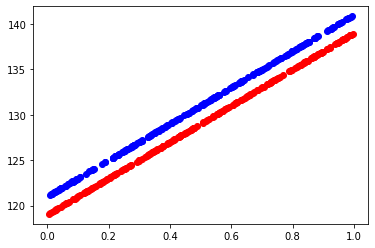

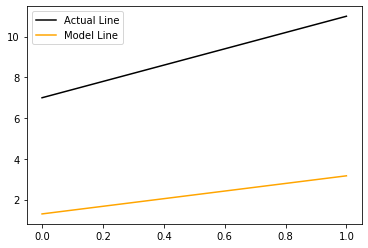

In [0]:
display_random_data(data, labels)
x_1 = np.linspace(0.0, 1.0)
x_2_real = x_1 * w_real + b_real
x_2_prediction = x_1 * w_line + b_line
plt.plot(x_1, x_2_real, color='black', label='Actual Line');
plt.plot(x_1, x_2_prediction, color='orange', label='Model Line');
plt.legend();